In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
#conn = engine.connect()

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [3]:
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

#Design a query to retrieve the last 12 months of precipitation data
data = engine.execute("SELECT * FROM measurement WHERE date > '2016-8-24'")

C:\Users\guye0\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


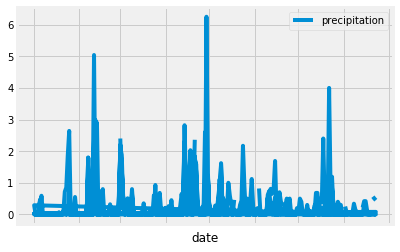

In [4]:
hdata = pd.DataFrame(data)
hdata.columns = ['id','station','date','prcp','tobs']
FHdata = hdata[['date','prcp']]


fig,ax = plt.subplots()
ax.plot(pd.to_datetime(FHdata['date']),FHdata['prcp'],label='precipitation')
ax.set_xlabel('date')
ax.set_xticklabels([])
ax.legend()

plt.show()

In [5]:
pd.DataFrame.describe(FHdata['prcp'])

count    1267.000000
mean        0.165927
std         0.453913
min         0.000000
25%         0.000000
50%         0.000000
75%         0.105000
max         6.250000
Name: prcp, dtype: float64

In [6]:
#Design a query... I have no idea what this means. Why would I perform data analysis within a database when the data
#could be extracted THEN analyzed. 

fulls = engine.execute("SELECT * FROM measurement")
fdata = pd.DataFrame(fulls)
fdata.columns = ['id','station','date','prcp','tobs']
fdata['station'].nunique()

9